In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
# Girdi değişkenleri
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Çıktı değişkeni
dress_level = ctrl.Consequent(np.arange(0, 101, 1), 'dress_level')

# Üyelik fonksiyonları tanımlama
temperature['low'] = fuzz.trimf(temperature.universe, [0, 10, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 40, 50])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 30, 60])
humidity['medium'] = fuzz.trimf(humidity.universe, [50, 70, 90])
humidity['high'] = fuzz.trimf(humidity.universe, [80, 100, 100])

dress_level['light'] = fuzz.trimf(dress_level.universe, [0, 30, 60])
dress_level['medium'] = fuzz.trimf(dress_level.universe, [50, 70, 90])
dress_level['heavy'] = fuzz.trimf(dress_level.universe, [80, 100, 100])

# Kurallar oluşturma
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], dress_level['light'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['medium'], dress_level['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], dress_level['heavy'])

# Kontrol sistemi oluşturma
dress_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
dressing = ctrl.ControlSystemSimulation(dress_ctrl)

# Girdi değerlerini ayarlama
dressing.input['temperature'] = 25
dressing.input['humidity'] = 40

# Kural tabanlı çıkarım yapma
dressing.compute()

Giyinme Seviyesi: 30.000000000000004


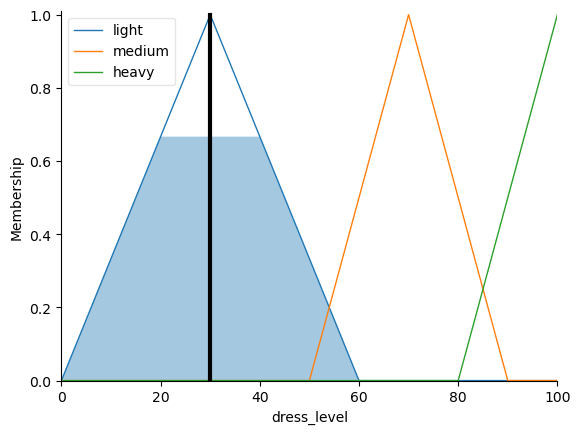

In [5]:
# Sonucu yazdırma
print("Giyinme Seviyesi:", dressing.output['dress_level'])
dress_level.view(sim=dressing)